Minh Ta

Dr. Stonedahl

DATA-360

In [ ]:
import pandas as pd

Today I am going to analyze countries' happiness score and how it correlates with multiple other factors (e.g. GDP, Birth/death rate,...)

First, the 2017 happiness data set (which can be found here: https://www.kaggle.com/unsdsn/world-happiness) ranks the happiness of countries based on the data from the Gallup World Poll. We will merge this dataset with the world countries information dataset (here: https://www.kaggle.com/fernandol/countries-of-the-world), which originated from the CIA's website, to gain more insights into countries presented in this happiness dataset.

Let's see what the datasets look like:

In [106]:
happiness2017 = pd.read_csv('happiness/2017.csv')
happiness2017[0:5]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [107]:
countries = pd.read_csv('countries of the world.csv')
countries[0:5]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN


Before our analysis, we will have to clean the data and merge them together, based on `Country`. Notice that I had to `strip()` both datasets so that 

In [108]:
happiness2017["Country"] = happiness2017["Country"].str.strip()
countries["Country"] = countries["Country"].str.strip()
mergedDat = happiness2017.merge(countries, on="Country")
mergedDat[0:5]

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,...,Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,...,"461,7","2,87",0,"97,13",3,"11,46","9,4","0,021","0,415","0,564"
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,...,"614,6","54,02","0,19","45,79",3,"11,13","10,36","0,018","0,246","0,735"
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,...,"647,7","0,07",0,"99,93",3,"13,64","6,72","0,086","0,15","0,765"
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,...,"680,9","10,42","0,61","88,97",3,"9,71","8,49","0,015","0,34","0,645"
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,...,"405,3","7,19","0,03","92,78",3,"10,45","9,86","0,028","0,295","0,676"


We will extract some columns of data for our analysis. Here I picked Region. Happiness.Score, GDP, Literacy, Phones, and Net Migration. Also we will drop all the NaN values from the dataset.

In [109]:
graphDat = mergedDat[['Region', 'Happiness.Score', 'GDP ($ per capita)', 'Literacy (%)', 'Phones (per 1000)', 'Net migration']]
graphDat = graphDat.dropna()

I figured out that the second dataset has commas as decimal point. So we will have to convert that back to dots.

In [110]:
graphDat['GDP ($ per capita)'] = pd.to_numeric(graphDat['GDP ($ per capita)'].astype(str).str.replace(',','.'))
graphDat['Literacy (%)'] = pd.to_numeric(graphDat['Literacy (%)'].astype(str).str.replace(',','.'))
graphDat['Phones (per 1000)'] = pd.to_numeric(graphDat['Phones (per 1000)'].astype(str).str.replace(',','.'))
graphDat['Net migration'] = pd.to_numeric(graphDat['Net migration'].astype(str).str.replace(',','.'))

Here is what `graphDat` dataset looks like so far

In [111]:
graphDat[0:5]

,Region,Happiness.Score,GDP ($ per capita),Literacy (%),Phones (per 1000),Net migration
0,WESTERN EUROPE,7.537,37800.0,100.0,461.7,1.74
1,WESTERN EUROPE,7.522,31100.0,100.0,614.6,2.48
2,WESTERN EUROPE,7.504,30900.0,99.9,647.7,2.38
3,WESTERN EUROPE,7.494,32700.0,99.0,680.9,4.05
4,WESTERN EUROPE,7.469,27400.0,100.0,405.3,0.95


# VISUALIZING DATA

We are going to import `seaborn`, `matplotlib`, and `numpy` for our visualization

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# for graphs to display in the notebook
%matplotlib inline 

For this, I tried to manipulate Literacy data because it was throwing errors earlier, but I haven't got it done yet. I will try again later. We will skip Literacy for now.

In [113]:
graphDat['Literacy (%)'] = graphDat['Literacy (%)'] * 100

We will create a pairplot of all the data we have as follow:

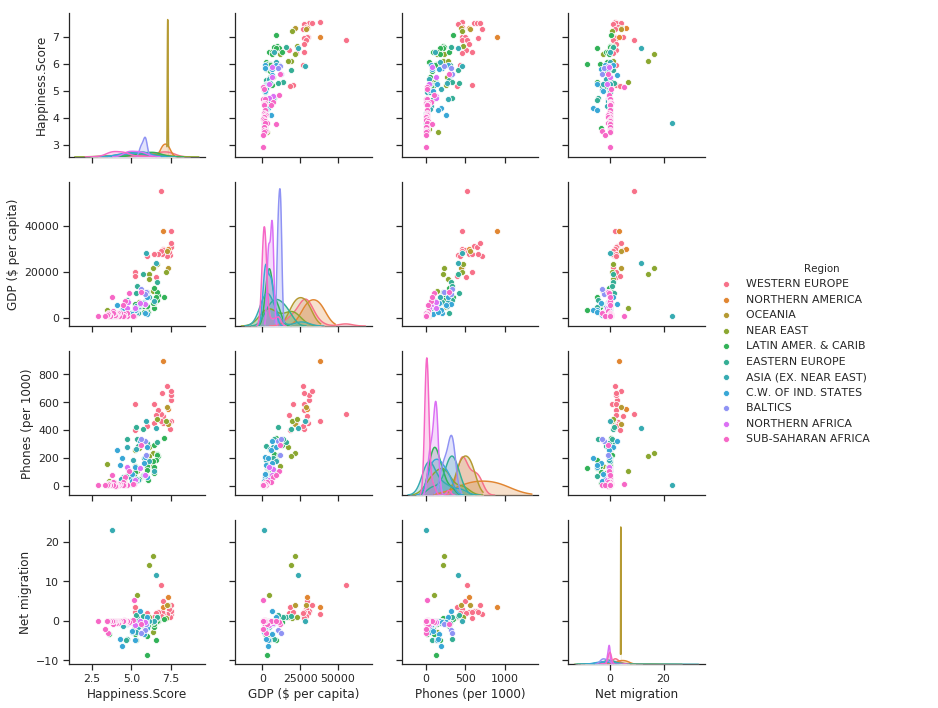

In [114]:
sns.set(style="ticks")

sns.pairplot(graphDat, hue='Region', vars=['Happiness.Score', 'GDP ($ per capita)', 'Phones (per 1000)', 'Net migration']);

We will focus on the first column of graphs. Here we can see that there is somewhat a correlation between happiness score and GDP and the ammount of Phones per person.

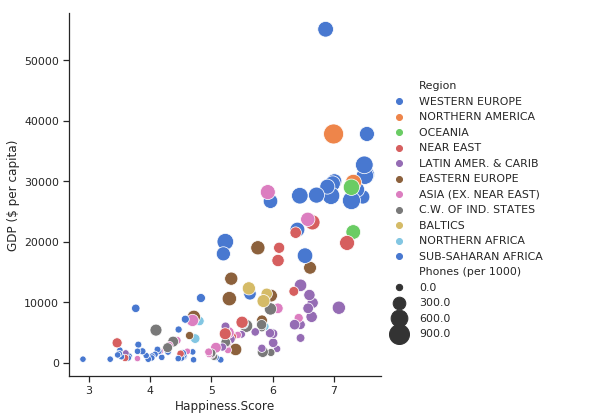

In [115]:
sns.relplot(x="Happiness.Score", y="GDP ($ per capita)", hue="Region", size="Phones (per 1000)",
            sizes=(40, 400), alpha=1, palette="muted",
            height=6, data=graphDat)

Looking closer into Happiness, GDP, and Phones, we also see this log correlation as when GDP and Phones increase, Happiness increases. 